In [1]:
import numpy as np
from matplotlib import animation
import h5py
import matplotlib.pyplot as plt
%matplotlib inline
mywriter = animation.ImageMagickFileWriter()
plt.rcParams['image.cmap'] = 'RdBu_r'

In [2]:
folder = 'pulse_1'
sim_name = 'k24m1'

In [11]:
filepath = folder + '/' + sim_name + "/" + sim_name + "_s1/" + sim_name + "_s1_p0.h5"
data = h5py.File(filepath, "r")
te = data['tasks']['total e profile'][:]
te_1 = data['tasks']['total e'][:]
z = data['scales/z/1.0'][:]
t = data['scales']['sim_time'][:]
x = data['scales/x/1.0'][:]
bb = data['tasks']['buoyancy'][:]
uu = data['tasks']['horizontal velocity'][:]
ww = data['tasks']['vertical velocity'][:]
tropenerg = data['tasks']['tropo energy'][:]
te_3d = data['tasks']['total e snap'][:]
#data.close()

In [17]:
filepath = "k10m1/k10m1_s1/k10m1_s1_p0.h5"
data = h5py.File(filepath, "r")
te = data['tasks']['total e profile'][:]
te_1 = data['tasks']['total e'][:]
z = data['scales/z/1.0'][:]
t = data['scales']['sim_time'][:]
x = data['scales/x/1.0'][:]
uu = data['tasks']['horizontal velocity'][:]

In [22]:
uu.shape

(300, 144, 256)

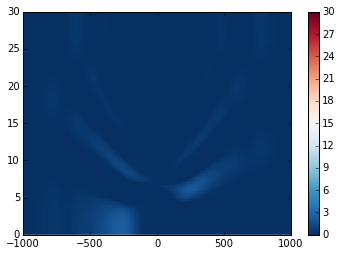

In [4]:
fig = plt.figure() 
im = plt.imshow(uu[50,:,:].T, origin = 'lower', interpolation = 'none',\
                extent = [x[0]/1000., x[-1]/1000. ,z[0]/1000., 30000/1000.], aspect = 'auto') 
#im.set_clim(-0.06,0.06) # buoyancy scale
im.set_clim(0,30)
plt.xlim(-1000,1000)
plt.colorbar()

In [57]:
def init(): 
    im.set_data([])
    return im

def animate(tstep):
    datagrid = te_3d[tstep,:,:].T         
    im.set_data(datagrid)
    return im
                  
def frame(tstep):
    datagrid = bb[tstep,:,:].T        
    return stratolid

In [58]:
anim = animation.FuncAnimation(fig,animate, frames= range(0,103,1), interval = 10, blit = True)

In [59]:
filename = folder + '_te.gif'
anim.save(filename , writer= mywriter) 